In [1]:
from sim.biped import Biped
from dm_control.composer import Environment

dt = 0.02
robot = Biped(control_timestep=dt)
env = Environment(robot, strip_singleton_obs_buffer_dim=True)

In [ ]:
import numpy as np
from sim.robot_state import RobotState
import mujoco
import mediapy as media

FRAMERATE = 30

env.reset()
# run simulation for 0.5 seconds, create video, and collect pitch angle

physics = env.physics
model, data = physics.model, physics.data
renderer = mujoco.Renderer(model.ptr, height=480, width=640)

frames = []
pitch_angles = []
dts = []
for t in np.arange(0, 0.5, dt):
    timestep = env.step(np.zeros(4))
    state = RobotState(timestep)
    pitch_angles.append(state.orientation[1])
    dts.append(t)

    # Render and save frames.
    if len(frames) < t * FRAMERATE:
        renderer.update_scene(data.ptr)
        pixels = renderer.render()
        frames.append(pixels)

# Display video.
media.write_video("out.mp4", frames, fps=FRAMERATE, backend="opencv")
media.show_video("out.mp4")
renderer.close()

RuntimeError: Program 'ffmpeg' is not found; perhaps install ffmpeg using 'apt install ffmpeg'.

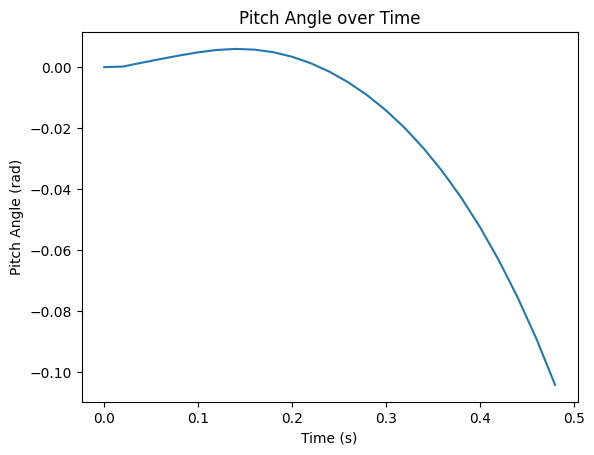

In [ ]:
import matplotlib.pyplot as plt

plt.plot(dts, pitch_angles)
plt.xlabel("Time (s)")
plt.ylabel("Pitch Angle (rad)")
plt.title("Pitch Angle over Time")
plt.show()